# 必要モジュールのインポート

In [38]:
import numpy as np
print("numpy.version=" + np.__version__)
import pandas as pd
print("pandas.version=" + pd.__version__)
import sklearn as sk
print("sklearn.version=" + sk.__version__)
from sklearn.linear_model import LinearRegression, SGDClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error # 回帰問題における性能評価に関する関数
from sklearn.model_selection import train_test_split # ホールドアウト法に関する関数
from sklearn.model_selection import KFold # 交差検証法に関する関数
from sklearn.linear_model import Ridge,Lasso,ElasticNet #正則化項付き最小二乗法を行うためのライブラリ
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
print("matplotlib.version=" + mpl.__version__)
import seaborn as sns
print("seaborn.version=" + sns.__version__)
import pydotplus
import graphviz
print("graphviz.version=" + graphviz.__version__)
import tensorflow as tf
print("tensorflow.version=" + tf.__version__)
import keras
print("keras.version=" + keras.__version__)

import warnings
warnings.filterwarnings('ignore')

numpy.version=1.15.2
pandas.version=0.23.4
sklearn.version=0.19.1
matplotlib.version=3.0.0
seaborn.version=0.9.0
graphviz.version=0.8.4
tensorflow.version=1.11.0
keras.version=2.2.4


# データのインポート
元データをdf0とする

In [2]:
df0 = pd.read_excel("measurements2.xlsx")
df0.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


# データの確認

In [3]:
print('dataframeの行数・列数の確認\n', df0.shape)
print("\n")
print('indexの確認\n', df0.index)
print("\n")
print('columnの確認\n', df0.columns)
print("\n")
print('dataframeの各列のデータ型を確認\n', df0.dtypes)

dataframeの行数・列数の確認
 (388, 12)


indexの確認
 RangeIndex(start=0, stop=388, step=1)


columnの確認
 Index(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside',
       'specials', 'gas_type', 'AC', 'rain', 'sun', 'refill liters',
       'refill gas'],
      dtype='object')


dataframeの各列のデータ型を確認
 distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
specials          object
gas_type          object
AC                 int64
rain               int64
sun                int64
refill liters    float64
refill gas        object
dtype: object


In [4]:
df0.describe()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters
count,388.000000,388.000000,388.000000,376.000000,388.000000,388.000000,388.000000,388.000000,13.000000
mean,19.652835,4.912371,41.927835,21.929521,11.358247,0.077320,0.123711,0.082474,37.115385
std,22.667837,1.033172,13.598524,1.010455,6.991542,0.267443,0.329677,0.275441,8.587282
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000,10.000000
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000,37.600000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000,38.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.000000,0.000000,39.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000,45.000000


In [5]:
#欠損値確認
df0.isnull().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

# データ前処理

## データ１

In [6]:
df1 = df0

### temp inside処理

In [7]:
df1.temp_inside.value_counts()

21.5    133
22.0    102
22.5     59
20.0     25
23.0     13
21.0     13
25.0     12
24.5      7
20.5      4
24.0      3
25.5      2
23.5      2
19.0      1
Name: temp_inside, dtype: int64

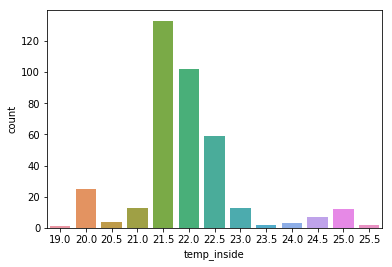

In [8]:
sns.countplot(x="temp_inside",data=df1)

In [9]:
print("tempinsitde平均値="+ str(df1.temp_inside.mean()))
print("tempinsitde中央値="+ str(df1.temp_inside.median()))

tempinsitde平均値=21.929521276595743
tempinsitde中央値=22.0


In [10]:
#temp_insideの欠損値を平均値で埋める
df1.temp_inside = df1.temp_inside.fillna(df1.temp_inside.mean())

### specials処理

In [11]:
df1.specials.unique()

array([nan, 'AC rain', 'AC', 'rain', 'snow', 'AC snow',
       'half rain half sun', 'sun', 'AC sun', 'sun ac', 'ac', 'AC Sun',
       'ac rain'], dtype=object)

In [12]:
#名寄せ
df1['specials'] = df1['specials'].str.replace('sun ac', 'AC sun')
df1['specials'] = df1['specials'].str.replace('AC Sun', 'AC sun')
df1['specials'] = df1['specials'].str.replace('ac rain', 'AC rain')
df1['specials'] = df1['specials'].str.replace('ac', 'AC')

In [13]:
df1.specials.unique()

array([nan, 'AC rain', 'AC', 'rain', 'snow', 'AC snow',
       'half rain half sun', 'sun', 'AC sun'], dtype=object)

In [14]:
#specialsをダミー変数化
df1 = pd.get_dummies(df1, dummy_na=True,columns=['specials'])
df1.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,refill liters,refill gas,specials_AC,specials_AC rain,specials_AC snow,specials_AC sun,specials_half rain half sun,specials_rain,specials_snow,specials_sun,specials_nan
0,28.0,5.0,26,21.5,12,E10,0,0,0,45.0,E10,0,0,0,0,0,0,0,0,1
1,12.0,4.2,30,21.5,13,E10,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,1
2,11.2,5.5,38,21.5,15,E10,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,1
3,12.9,3.9,36,21.5,14,E10,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,1
4,18.5,4.5,46,21.5,15,E10,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,1


### gas type処理

In [15]:
df1.gas_type.unique()

array(['E10', 'SP98'], dtype=object)

In [16]:
#gas typeをダミー変数化
df1 = pd.get_dummies(df1,columns=["gas_type"])
df1.head()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters,refill gas,...,specials_AC rain,specials_AC snow,specials_AC sun,specials_half rain half sun,specials_rain,specials_snow,specials_sun,specials_nan,gas_type_E10,gas_type_SP98
0,28.0,5.0,26,21.5,12,0,0,0,45.0,E10,...,0,0,0,0,0,0,0,1,1,0
1,12.0,4.2,30,21.5,13,0,0,0,NaN,NaN,...,0,0,0,0,0,0,0,1,1,0
2,11.2,5.5,38,21.5,15,0,0,0,NaN,NaN,...,0,0,0,0,0,0,0,1,1,0
3,12.9,3.9,36,21.5,14,0,0,0,NaN,NaN,...,0,0,0,0,0,0,0,1,1,0
4,18.5,4.5,46,21.5,15,0,0,0,NaN,NaN,...,0,0,0,0,0,0,0,1,1,0


### refill liters処理

In [17]:
df1["refill liters"].unique()

array([45. ,  nan, 37.6, 37.7, 38. , 38.3, 10. , 39. , 41. , 37. , 37.2])

In [18]:
#ひとまず欠損値に0を置く
df1 = df1.fillna({'refill liters': 0})

In [19]:
df1["refill liters"].unique()

array([45. ,  0. , 37.6, 37.7, 38. , 38.3, 10. , 39. , 41. , 37. , 37.2])

### refill gas処理

In [20]:
df1["refill gas"].unique()

array(['E10', nan, 'SP98'], dtype=object)

In [21]:
df1 = pd.get_dummies(df1, dummy_na=True,columns=['refill gas'])
df1.head()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters,specials_AC,...,specials_half rain half sun,specials_rain,specials_snow,specials_sun,specials_nan,gas_type_E10,gas_type_SP98,refill gas_E10,refill gas_SP98,refill gas_nan
0,28.0,5.0,26,21.5,12,0,0,0,45.0,0,...,0,0,0,0,1,1,0,1,0,0
1,12.0,4.2,30,21.5,13,0,0,0,0.0,0,...,0,0,0,0,1,1,0,0,0,1
2,11.2,5.5,38,21.5,15,0,0,0,0.0,0,...,0,0,0,0,1,1,0,0,0,1
3,12.9,3.9,36,21.5,14,0,0,0,0.0,0,...,0,0,0,0,1,1,0,0,0,1
4,18.5,4.5,46,21.5,15,0,0,0,0.0,0,...,0,0,0,0,1,1,0,0,0,1


In [22]:
#欠損値確認
df1.isnull().sum()

distance                       0
consume                        0
speed                          0
temp_inside                    0
temp_outside                   0
AC                             0
rain                           0
sun                            0
refill liters                  0
specials_AC                    0
specials_AC rain               0
specials_AC snow               0
specials_AC sun                0
specials_half rain half sun    0
specials_rain                  0
specials_snow                  0
specials_sun                   0
specials_nan                   0
gas_type_E10                   0
gas_type_SP98                  0
refill gas_E10                 0
refill gas_SP98                0
refill gas_nan                 0
dtype: int64

In [23]:
# 相関係数を確認
df1.corr()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters,specials_AC,...,specials_half rain half sun,specials_rain,specials_snow,specials_sun,specials_nan,gas_type_E10,gas_type_SP98,refill gas_E10,refill gas_SP98,refill gas_nan
distance,1.000000,-0.128967,0.562299,0.075178,0.088175,-0.025738,-0.019791,0.081120,0.107045,0.038373,...,0.053996,0.010723,-0.029320,0.055737,-0.058454,0.053411,-0.053411,0.026079,0.106134,-0.100157
consume,-0.128967,1.000000,-0.227866,-0.160623,-0.320811,0.096591,0.248118,-0.170667,-0.074095,-0.042500,...,-0.010462,0.157122,0.021755,-0.168194,-0.020183,0.015327,-0.015327,-0.025731,-0.079080,0.078574
speed,0.562299,-0.227866,1.000000,0.059293,0.015411,-0.035408,0.009489,0.081618,-0.007446,-0.060027,...,0.007756,0.038156,0.015635,0.033523,-0.042103,0.097360,-0.097360,-0.073428,0.046177,0.009556
temp_inside,0.075178,-0.160623,0.059293,1.000000,0.359500,0.297376,-0.036937,0.242248,-0.021348,0.312831,...,0.003606,-0.068993,0.095124,0.151238,-0.266888,-0.010198,0.010198,-0.014897,-0.017092,0.022834
temp_outside,0.088175,-0.320811,0.015411,0.359500,1.000000,0.167562,-0.186315,0.346903,-0.041595,0.235493,...,-0.017168,-0.122726,-0.139378,0.300752,-0.184759,-0.148705,0.148705,-0.009135,-0.043809,0.040320
AC,-0.025738,0.096591,-0.035408,0.297376,0.167562,1.000000,0.242915,0.088598,-0.052571,0.616618,...,-0.014715,-0.086790,-0.025553,-0.079168,-0.492968,-0.105285,0.105285,-0.033075,-0.042002,0.053898
rain,-0.019791,0.248118,0.009489,-0.036937,-0.186315,0.242915,1.000000,-0.112650,0.033505,-0.072696,...,0.135289,0.797937,0.234936,-0.102757,-0.650855,-0.060328,0.060328,0.026474,0.055653,-0.060541
sun,0.081120,-0.170667,0.081618,0.242248,0.346903,0.088598,-0.112650,1.000000,-0.054448,-0.058007,...,-0.015240,-0.089888,-0.026466,0.912175,-0.533973,-0.022761,0.022761,-0.034256,-0.043501,0.055822
refill liters,0.107045,-0.074095,-0.007446,-0.021348,-0.041595,-0.052571,0.033505,-0.054448,1.000000,-0.035136,...,0.065003,0.053644,-0.016031,-0.049666,0.023497,-0.000741,0.000741,0.640010,0.727194,-0.975377
specials_AC,0.038373,-0.042500,-0.060027,0.312831,0.235493,0.616618,-0.072696,-0.058007,-0.035136,1.000000,...,-0.009835,-0.058007,-0.017079,-0.052912,-0.344586,-0.105929,0.105929,-0.022106,-0.028073,0.036023


### データ前処理まとめ
単純なダミー変数化、欠損値の埋めを行った。<br>
AC,rain,sunなど（specials含む）は欠損が多いため、0か欠損はわからない状態。<br>
refill literは一旦欠損値を0と置いたが、0なのか、欠損なのかはわからない状態。<br>
refill gasは、は欠損が多いため、0か欠損はわからない状態。

## モデル作成・検証（線形回帰モデル）

In [24]:
#線形回帰モデルの検証用関数

def ModelVerificationLinearRegression(X, y, df):
    X1 = X
    y1 = y
    print("\n【線形回帰モデル】")
    regr = LinearRegression(fit_intercept=True)
    regr.fit(X1, y1)

    #説明変数の数
    exponum = len(xcol)

    # 重みを取り出す

    w0 = regr.intercept_

    #w1 = regr.coef_[0] w2=...
    #上記をfor文にする

    wall = []
    for i in range(exponum):
        wall.append(regr.coef_[i])
    
    #x1 = dfgus['distance'].values x2=...
    #上記をfor文にする

    xall = []
    for i in range(exponum):
        xall.append(df[xcol[i]].values)
    
    # 重みと二乗誤差の確認

    #y_est = w0 + w1 * x1 + w2 * x2 + w3* x3...
    #上記をfor文にする

    y_est = w0
    for i in range(exponum):
        y_est =  y_est + wall[i] * xall[i]
    
    squared_error = 0.5 * np.sum((y - y_est) ** 2)

    print("\n■重みの表示")
    print("W0=" + str(w0))
    for i in range(exponum):
        print("W"+ str(i+1) + "=" + str(wall[i]))
    
    print("\n■全データを使用した訓練誤差の確認")
    print('二乗誤差 = {:.3f}'.format(squared_error))
    
    # 値を予測
    y_pred = regr.predict(X)

    score = regr.score(X, y)
    print("score = %s"%round(score,3) ) 

    # MSEを計算
    mse = mean_squared_error(y, y_pred) 
    print("MSE = %s"%round(mse,3) )  

    # MAEを計算
    mae = mean_absolute_error(y, y_pred) 
    print("MAE = %s"%round(mae,3) )

    # RMSEを計算
    rmse = np.sqrt(mse)
    print("RMSE = %s"%round(rmse, 3) )
    
    print("\n■ホールドアウト法による訓練誤差、汎化誤差の評価")
    X2 = X
    y2 = y
    # test_size = 0.1 # 全データのうち、何%をテストデータにするか（今回は10%～に設定）
    for test_size in np.arange(0.1,1,0.1):
        print("test_size=" + str(test_size))
    
        X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=test_size, random_state=1234) # ホールドアウト法を実行（テストデータはランダム選択）
    
        # 学習用データを使って線形回帰モデルを学習
        regr2 = LinearRegression(fit_intercept=True)
        regr2.fit(X_train, y_train)

        # 学習用データに対する予測を実行
        y_pred_train = regr2.predict(X_train)

        # 学習データに対するMAEを計算（訓練誤差の評価）
        mae = mean_absolute_error(y_train, y_pred_train)
        print("学習データMAE = %s"%round(mae,3) )

        # テストデータに対する予測を実行
        y_pred_test = regr2.predict(X_test)

        # テストデータに対するMAEを計算（汎化誤差の評価）
        mae = mean_absolute_error(y_test, y_pred_test)
        print("テストデータMAE = %s"%round(mae,3) )
        
    print("\n■交差検証（クロスバリデーション）法による汎化誤差の評価")
    X3 = X
    y3 = y   
    n_split = 5 # グループ数を設定（今回は5分割）

    cross_valid_mae = 0
    split_num = 1

    # テスト役を交代させながら学習と評価を繰り返す
    for train_idx, test_idx in KFold(n_splits=n_split, random_state=1234).split(X3, y3):
        X_train, y_train = X[train_idx], y[train_idx] #学習用データ
        X_test, y_test = X[test_idx], y[test_idx]     #テスト用データ
    
        # 学習用データを使って線形回帰モデルを学習
        regr3 = LinearRegression(fit_intercept=False)
        regr3.fit(X_train, y_train)

        # テストデータに対する予測を実行
        y_pred_test = regr3.predict(X_test)
    
        # テストデータに対するMAEを計算
        mae = mean_absolute_error(y_test, y_pred_test)
        print("Fold %s"%split_num)
        print("MAE = %s"%round(mae, 3))
        print()
    
        cross_valid_mae += mae #後で平均を取るためにMAEを加算
        split_num += 1

    # MAEの平均値を最終的な汎化誤差値とする
    final_mae = cross_valid_mae / n_split
    print("Cross Validation MAE = %s"%round(final_mae, 3))    

In [25]:
#データ１全ての説明変数を使用したデータ
y = df1["consume"].values

xcol = df1.columns.values

xcol = np.delete(xcol,1)
print("使用した説明変数")
print(xcol)

X = df1[xcol].values

ModelVerificationLinearRegression(X, y, df1)

使用した説明変数
['distance' 'speed' 'temp_inside' 'temp_outside' 'AC' 'rain' 'sun'
 'refill liters' 'specials_AC' 'specials_AC rain' 'specials_AC snow'
 'specials_AC sun' 'specials_half rain half sun' 'specials_rain'
 'specials_snow' 'specials_sun' 'specials_nan' 'gas_type_E10'
 'gas_type_SP98' 'refill gas_E10' 'refill gas_SP98' 'refill gas_nan']

【線形回帰モデル】

■重みの表示
W0=-0.17927221328765253
W1=0.0016519299569784356
W2=-0.017546074713512876
W3=-0.06349920896753691
W4=-0.03880916327124826
W5=-0.16460185511135908
W6=7.096105999071824
W7=2.510032099696143
W8=0.13875137891574066
W9=3.885849116875397
W10=-2.951163754129668
W11=-1.3672361405643922
W12=1.6954651233512683
W13=0.9236875190259037
W14=-3.012287972169048
W15=-3.535085714379313
W16=0.8145669763448763
W17=3.5462048456449704
W18=0.009822103433176113
W19=-0.00982210343317363
W20=-1.9538814793271682
W21=-2.0721099755326486
W22=4.025991454859813

■全データを使用した訓練誤差の確認
二乗誤差 = 140.089
score = 0.322
MSE = 0.722
MAE = 0.58
RMSE = 0.85

■ホールドアウト法による訓練誤差、汎

In [26]:
#データ１相関が0.2以上の説明変数を選択
y = df1["consume"].values

xcol = ['speed', 'temp_outside','rain', ]

print("使用した説明変数")
print(xcol)

X = df1[xcol].values

ModelVerificationLinearRegression(X, y, df1)

使用した説明変数
['speed', 'temp_outside', 'rain']

【線形回帰モデル】

■重みの表示
W0=6.024415280336948
W1=-0.017126921731249814
W2=-0.0414426407108481
W3=0.6205281576238292

■全データを使用した訓練誤差の確認
二乗誤差 = 167.210
score = 0.19
MSE = 0.862
MAE = 0.619
RMSE = 0.928

■ホールドアウト法による訓練誤差、汎化誤差の評価
test_size=0.1
学習データMAE = 0.614
テストデータMAE = 0.724
test_size=0.2
学習データMAE = 0.618
テストデータMAE = 0.661
test_size=0.30000000000000004
学習データMAE = 0.636
テストデータMAE = 0.642
test_size=0.4
学習データMAE = 0.635
テストデータMAE = 0.657
test_size=0.5
学習データMAE = 0.638
テストデータMAE = 0.689
test_size=0.6
学習データMAE = 0.54
テストデータMAE = 0.67
test_size=0.7000000000000001
学習データMAE = 0.48
テストデータMAE = 0.66
test_size=0.8
学習データMAE = 0.491
テストデータMAE = 0.656
test_size=0.9
学習データMAE = 0.4
テストデータMAE = 0.626

■交差検証（クロスバリデーション）法による汎化誤差の評価
Fold 1
MAE = 1.907

Fold 2
MAE = 1.513

Fold 3
MAE = 1.516

Fold 4
MAE = 1.048

Fold 5
MAE = 1.861

Cross Validation MAE = 1.569


## モデル作成・検証（多項式回帰モデル）

In [27]:
def ModelVerificationPolynomialFeatures(X, y, df):
    print("\n【多項式回帰モデル】")
    X1 = X
    y1 = y
    degrees = [0, 1, 2, 3, 4, 5]#degreeの値を指定する

    for degree in degrees:
        regr = make_pipeline(PolynomialFeatures(degree), LinearRegression())
        regr.fit(X1, y1)

        # 値を予測
        y_pred = regr.predict(X1)

        score = regr.score(X1, y1)

        print("\n degree=" + str(degree))
        print("-----------------------------------------------------------")
        print("score = %s"%round(score,3) ) 

        # MSEを計算
        mse = mean_squared_error(y, y_pred) 
        print("MSE = %s"%round(mse,3) )  

        # MAEを計算
        mae = mean_absolute_error(y, y_pred) 
        print("MAE = %s"%round(mae,3) )

        # RMSEを計算
        rmse = np.sqrt(mse)
        print("RMSE = %s"%round(rmse, 3) )
        
        print("\n■ホールドアウト法による訓練誤差、汎化誤差の評価")
        X2 = X
        y2 = y
        # test_size = 0.1 # 全データのうち、何%をテストデータにするか（今回は10%～に設定）
        for test_size in np.arange(0.1,1,0.1):
            print("test_size=" + str(test_size))
    
            X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=test_size, random_state=1234) # ホールドアウト法を実行（テストデータはランダム選択）
    
            # 学習用データを使って多項式回帰モデルを学習
            regr2 = make_pipeline(PolynomialFeatures(degree), LinearRegression())
            regr2.fit(X2, y2)

            # 学習用データに対する予測を実行
            y_pred_train = regr2.predict(X_train)

            # 学習データに対するMAEを計算（訓練誤差の評価）
            mae = mean_absolute_error(y_train, y_pred_train)
            print("学習データMAE = %s"%round(mae,3) )

            # テストデータに対する予測を実行
            y_pred_test = regr2.predict(X_test)

            # テストデータに対するMAEを計算（汎化誤差の評価）
            mae = mean_absolute_error(y_test, y_pred_test)
            print("テストデータMAE = %s"%round(mae,3) )
        
        print("\n■交差検証（クロスバリデーション）法による汎化誤差の評価")
        X3 = X
        y3 = y   
        n_split = 5 # グループ数を設定（今回は5分割）

        cross_valid_mae = 0
        split_num = 1

        # テスト役を交代させながら学習と評価を繰り返す
        for train_idx, test_idx in KFold(n_splits=n_split, random_state=1234).split(X3, y3):
            X_train, y_train = X[train_idx], y[train_idx] #学習用データ
            X_test, y_test = X[test_idx], y[test_idx]     #テスト用データ
    
            # 学習用データを使って多項式回帰モデルを学習
            regr3 = make_pipeline(PolynomialFeatures(degree), LinearRegression())
            regr3.fit(X3, y3)

            # テストデータに対する予測を実行
            y_pred_test = regr3.predict(X_test)
    
            # テストデータに対するMAEを計算
            mae = mean_absolute_error(y_test, y_pred_test)
            print("Fold %s"%split_num)
            print("MAE = %s"%round(mae, 3))
            print()
    
            cross_valid_mae += mae #後で平均を取るためにMAEを加算
            split_num += 1

        # MAEの平均値を最終的な汎化誤差値とする
        final_mae = cross_valid_mae / n_split
        print("Cross Validation MAE = %s"%round(final_mae, 3)) 
        

In [28]:
#全ての説明変数を使用したデータ
y = df1["consume"].values

xcol = df1.columns.values

xcol = np.delete(xcol,1)
print("使用した説明変数")
print(xcol)

X = df1[xcol].values

ModelVerificationPolynomialFeatures(X, y, df1)

使用した説明変数
['distance' 'speed' 'temp_inside' 'temp_outside' 'AC' 'rain' 'sun'
 'refill liters' 'specials_AC' 'specials_AC rain' 'specials_AC snow'
 'specials_AC sun' 'specials_half rain half sun' 'specials_rain'
 'specials_snow' 'specials_sun' 'specials_nan' 'gas_type_E10'
 'gas_type_SP98' 'refill gas_E10' 'refill gas_SP98' 'refill gas_nan']

【多項式回帰モデル】

 degree=0
-----------------------------------------------------------
score = 0.0
MSE = 1.065
MAE = 0.676
RMSE = 1.032

■ホールドアウト法による訓練誤差、汎化誤差の評価
test_size=0.1
学習データMAE = 0.68
テストデータMAE = 0.644
test_size=0.2
学習データMAE = 0.672
テストデータMAE = 0.695
test_size=0.30000000000000004
学習データMAE = 0.69
テストデータMAE = 0.644
test_size=0.4
学習データMAE = 0.69
テストデータMAE = 0.655
test_size=0.5
学習データMAE = 0.7
テストデータMAE = 0.652
test_size=0.6
学習データMAE = 0.623
テストデータMAE = 0.712
test_size=0.7000000000000001
学習データMAE = 0.584
テストデータMAE = 0.715
test_size=0.8
学習データMAE = 0.582
テストデータMAE = 0.699
test_size=0.9
学習データMAE = 0.512
テストデータMAE = 0.694

■交差検証（クロスバリデーション）法による汎化誤差の評価
Fol

In [29]:
#データ１相関が0.2以上の説明変数を選択
y = df1["consume"].values

xcol = ['speed', 'temp_outside','rain', ]

print("使用した説明変数")
print(xcol)

X = df1[xcol].values

ModelVerificationPolynomialFeatures(X, y, df1)

使用した説明変数
['speed', 'temp_outside', 'rain']

【多項式回帰モデル】

 degree=0
-----------------------------------------------------------
score = 0.0
MSE = 1.065
MAE = 0.676
RMSE = 1.032

■ホールドアウト法による訓練誤差、汎化誤差の評価
test_size=0.1
学習データMAE = 0.68
テストデータMAE = 0.644
test_size=0.2
学習データMAE = 0.672
テストデータMAE = 0.695
test_size=0.30000000000000004
学習データMAE = 0.69
テストデータMAE = 0.644
test_size=0.4
学習データMAE = 0.69
テストデータMAE = 0.655
test_size=0.5
学習データMAE = 0.7
テストデータMAE = 0.652
test_size=0.6
学習データMAE = 0.623
テストデータMAE = 0.712
test_size=0.7000000000000001
学習データMAE = 0.584
テストデータMAE = 0.715
test_size=0.8
学習データMAE = 0.582
テストデータMAE = 0.699
test_size=0.9
学習データMAE = 0.512
テストデータMAE = 0.694

■交差検証（クロスバリデーション）法による汎化誤差の評価
Fold 1
MAE = 0.749

Fold 2
MAE = 0.71

Fold 3
MAE = 0.636

Fold 4
MAE = 0.613

Fold 5
MAE = 0.672

Cross Validation MAE = 0.676

 degree=1
-----------------------------------------------------------
score = 0.19
MSE = 0.862
MAE = 0.619
RMSE = 0.928

■ホールドアウト法による訓練誤差、汎化誤差の評価
test_size=0.1
学習データMAE = 0.

## モデル作成・検証（SVM）

## モデル作成・検証（Random Forest）

In [36]:
def ModelVerificationRandomForest(X, y, df):

    regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
    regr.fit(X, y)
    RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)
    
    
    print("\n■全データを使用した訓練誤差の確認")
    
    # 値を予測
    y_pred = regr.predict(X)

    score = regr.score(X, y)
    print("score = %s"%round(score,3) ) 

    # MSEを計算
    mse = mean_squared_error(y, y_pred) 
    print("MSE = %s"%round(mse,3) )  

    # MAEを計算
    mae = mean_absolute_error(y, y_pred) 
    print("MAE = %s"%round(mae,3) )

    # RMSEを計算
    rmse = np.sqrt(mse)
    print("RMSE = %s"%round(rmse, 3) )
    
    print("\n■ホールドアウト法による訓練誤差、汎化誤差の評価")
    X2 = X
    y2 = y
    # test_size = 0.1 # 全データのうち、何%をテストデータにするか（今回は10%～に設定）
    for test_size in np.arange(0.1,1,0.1):
        print("test_size=" + str(test_size))
    
        X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=test_size, random_state=1234) # ホールドアウト法を実行（テストデータはランダム選択）
    
        # 学習用データを使ってランダムフォレストを学習
        regr2 = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
        regr2.fit(X_train, y_train)
        RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
        max_features='auto', max_leaf_nodes=None,
        min_impurity_decrease=0.0, min_impurity_split=None,
        min_samples_leaf=1, min_samples_split=2,
        min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
        oob_score=False, random_state=0, verbose=0, warm_start=False

        # 学習用データに対する予測を実行
        y_pred_train = regr2.predict(X_train)

        # 学習データに対するMAEを計算（訓練誤差の評価）
        mae = mean_absolute_error(y_train, y_pred_train)
        print("学習データMAE = %s"%round(mae,3) )

        # テストデータに対する予測を実行
        y_pred_test = regr2.predict(X_test)

        # テストデータに対するMAEを計算（汎化誤差の評価）
        mae = mean_absolute_error(y_test, y_pred_test)
        print("テストデータMAE = %s"%round(mae,3) )
        
    print("\n■交差検証（クロスバリデーション）法による汎化誤差の評価")
    X3 = X
    y3 = y   
    n_split = 5 # グループ数を設定（今回は5分割）

    cross_valid_mae = 0
    split_num = 1

    # テスト役を交代させながら学習と評価を繰り返す
    for train_idx, test_idx in KFold(n_splits=n_split, random_state=1234).split(X3, y3):
        X_train, y_train = X[train_idx], y[train_idx] #学習用データ
        X_test, y_test = X[test_idx], y[test_idx]     #テスト用データ
    
        # 学習用データを使ってランダムフォレストを学習
        regr3 = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
        regr3.fit(X_train, y_train)
        RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
        max_features='auto', max_leaf_nodes=None,
        min_impurity_decrease=0.0, min_impurity_split=None,
        min_samples_leaf=1, min_samples_split=2,
        min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
        oob_score=False, random_state=0, verbose=0, warm_start=False

        # テストデータに対する予測を実行
        y_pred_test = regr3.predict(X_test)
    
        # テストデータに対するMAEを計算
        mae = mean_absolute_error(y_test, y_pred_test)
        print("Fold %s"%split_num)
        print("MAE = %s"%round(mae, 3))
        print()
    
        cross_valid_mae += mae #後で平均を取るためにMAEを加算
        split_num += 1

    # MAEの平均値を最終的な汎化誤差値とする
    final_mae = cross_valid_mae / n_split
    print("Cross Validation MAE = %s"%round(final_mae, 3))    
    
    # 説明変数の重要度を出力する
    # scikit-learnで算出される重要度は、ある説明変数による不純度の減少量合計である。
    print("\n■説明変数の重要度の確認")
    print("\n", regr.feature_importances_)
    pd.DataFrame(regr.feature_importances_, index=df.columns.name).plot.bar(figsize=(10,5))
    plt.ylabel("Importance")
    plt.xlabel("Features")
    plt.show()

SyntaxError: invalid syntax (<ipython-input-36-0d23c5f60488>, line 53)

使用した説明変数
['distance' 'speed' 'temp_inside' 'temp_outside' 'AC' 'rain' 'sun'
 'refill liters' 'specials_AC' 'specials_AC rain' 'specials_AC snow'
 'specials_AC sun' 'specials_half rain half sun' 'specials_rain'
 'specials_snow' 'specials_sun' 'specials_nan' 'gas_type_E10'
 'gas_type_SP98' 'refill gas_E10' 'refill gas_SP98' 'refill gas_nan']

■全データを使用した訓練誤差の確認
score = 0.589
MSE = 0.437
MAE = 0.506
RMSE = 0.661

■ホールドアウト法による訓練誤差、汎化誤差の評価
test_size=0.1
学習データMAE = 0.566
テストデータMAE = 0.743
test_size=0.2
学習データMAE = 0.566
テストデータMAE = 0.656
test_size=0.30000000000000004
学習データMAE = 0.574
テストデータMAE = 0.667
test_size=0.4
学習データMAE = 0.559
テストデータMAE = 0.684
test_size=0.5
学習データMAE = 0.569
テストデータMAE = 0.76
test_size=0.6
学習データMAE = 0.464
テストデータMAE = 0.79
test_size=0.7000000000000001
学習データMAE = 0.468
テストデータMAE = 0.721
test_size=0.8
学習データMAE = 0.458
テストデータMAE = 0.996
test_size=0.9
学習データMAE = 0.314
テストデータMAE = 1.778

■交差検証（クロスバリデーション）法による汎化誤差の評価
Fold 1
MAE = 0.701

Fold 2
MAE = 0.767

Fold 3
MAE = 0.619

Fo

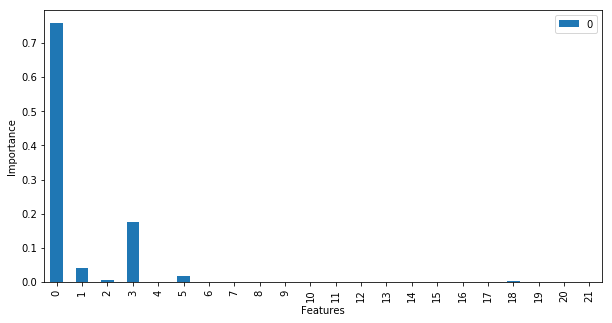

In [37]:
y = df1["consume"].values

xcol = df1.columns.values

xcol = np.delete(xcol,1)
print("使用した説明変数")
print(xcol)

X = df1[xcol].values

ModelVerificationRandomForest(X, y, df1)

## モデル作成・検証（Adaboost）

In [48]:
def ModelVerificationAdaboost(X, y, df):
    regr = AdaBoostRegressor(DecisionTreeRegressor(max_depth=3,
                                                   min_samples_leaf=2,
                                                   min_samples_split=2, 
                                                   random_state=1234,
                                                   criterion="mse"),
                                                   n_estimators=10, random_state=1234)
    
    regr.fit(X, y)
    print("\n■全データを使用した訓練誤差の確認")
    
    # 値を予測
    y_pred = regr.predict(X)

    score = regr.score(X, y)
    print("score = %s"%round(score,3) ) 

    # MSEを計算
    mse = mean_squared_error(y, y_pred) 
    print("MSE = %s"%round(mse,3) )  

    # MAEを計算
    mae = mean_absolute_error(y, y_pred) 
    print("MAE = %s"%round(mae,3) )

    # RMSEを計算
    rmse = np.sqrt(mse)
    print("RMSE = %s"%round(rmse, 3) )
    
    print("\n■ホールドアウト法による訓練誤差、汎化誤差の評価")
    X2 = X
    y2 = y
    # test_size = 0.1 # 全データのうち、何%をテストデータにするか（今回は10%～に設定）
    for test_size in np.arange(0.1,1,0.1):
        print("test_size=" + str(test_size))
    
        X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=test_size, random_state=1234) # ホールドアウト法を実行（テストデータはランダム選択）
    
        # 学習用データをアダブーストを学習
        regr2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=3,
                                                   min_samples_leaf=2,
                                                   min_samples_split=2, 
                                                   random_state=1234,
                                                   criterion="mse"),
                                                   n_estimators=10, random_state=1234)
        regr2.fit(X_train, y_train)

        # 学習用データに対する予測を実行
        y_pred_train = regr2.predict(X_train)

        # 学習データに対するMAEを計算（訓練誤差の評価）
        mae = mean_absolute_error(y_train, y_pred_train)
        print("学習データMAE = %s"%round(mae,3) )

        # テストデータに対する予測を実行
        y_pred_test = regr2.predict(X_test)

        # テストデータに対するMAEを計算（汎化誤差の評価）
        mae = mean_absolute_error(y_test, y_pred_test)
        print("テストデータMAE = %s"%round(mae,3) )
        
    print("\n■交差検証（クロスバリデーション）法による汎化誤差の評価")
    X3 = X
    y3 = y   
    n_split = 5 # グループ数を設定（今回は5分割）

    cross_valid_mae = 0
    split_num = 1

    # テスト役を交代させながら学習と評価を繰り返す
    for train_idx, test_idx in KFold(n_splits=n_split, random_state=1234).split(X3, y3):
        X_train, y_train = X[train_idx], y[train_idx] #学習用データ
        X_test, y_test = X[test_idx], y[test_idx]     #テスト用データ
    
        # 学習用データを使ってランダムフォレストを学習
        regr3 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=3,
                                                   min_samples_leaf=2,
                                                   min_samples_split=2, 
                                                   random_state=1234,
                                                   criterion="mse"),
                                                   n_estimators=10, random_state=1234)
        regr3.fit(X_train, y_train)

        # テストデータに対する予測を実行
        y_pred_test = regr3.predict(X_test)
    
        # テストデータに対するMAEを計算
        mae = mean_absolute_error(y_test, y_pred_test)
        print("Fold %s"%split_num)
        print("MAE = %s"%round(mae, 3))
        print()
    
        cross_valid_mae += mae #後で平均を取るためにMAEを加算
        split_num += 1

    # MAEの平均値を最終的な汎化誤差値とする
    final_mae = cross_valid_mae / n_split
    print("Cross Validation MAE = %s"%round(final_mae, 3))    
    
    # 説明変数の重要度を出力する
    # scikit-learnで算出される重要度は、ある説明変数による不純度の減少量合計である。
    print("\n■説明変数の重要度の確認")
    print("\n", regr.feature_importances_)
    pd.DataFrame(regr.feature_importances_, index=df.columns.name).plot.bar(figsize=(10,5))
    plt.ylabel("Importance")
    plt.xlabel("Features")
    plt.show()

使用した説明変数
['distance' 'speed' 'temp_inside' 'temp_outside' 'AC' 'rain' 'sun'
 'refill liters' 'specials_AC' 'specials_AC rain' 'specials_AC snow'
 'specials_AC sun' 'specials_half rain half sun' 'specials_rain'
 'specials_snow' 'specials_sun' 'specials_nan' 'gas_type_E10'
 'gas_type_SP98' 'refill gas_E10' 'refill gas_SP98' 'refill gas_nan']

■全データを使用した訓練誤差の確認
score = 0.699
MSE = 0.32
MAE = 0.452
RMSE = 0.566

■ホールドアウト法による訓練誤差、汎化誤差の評価
test_size=0.1
学習データMAE = 0.441
テストデータMAE = 0.61
test_size=0.2
学習データMAE = 0.418
テストデータMAE = 0.586
test_size=0.30000000000000004
学習データMAE = 0.421
テストデータMAE = 0.527
test_size=0.4
学習データMAE = 0.419
テストデータMAE = 0.53
test_size=0.5
学習データMAE = 0.42
テストデータMAE = 0.541
test_size=0.6
学習データMAE = 0.379
テストデータMAE = 0.551
test_size=0.7000000000000001
学習データMAE = 0.328
テストデータMAE = 0.554
test_size=0.8
学習データMAE = 0.342
テストデータMAE = 0.551
test_size=0.9
学習データMAE = 0.249
テストデータMAE = 0.564

■交差検証（クロスバリデーション）法による汎化誤差の評価
Fold 1
MAE = 0.656

Fold 2
MAE = 0.625

Fold 3
MAE = 0.476

Fold

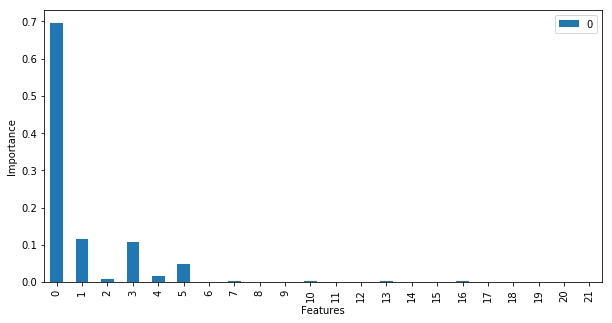

In [49]:
y = df1["consume"].values

xcol = df1.columns.values

xcol = np.delete(xcol,1)
print("使用した説明変数")
print(xcol)

X = df1[xcol].values

ModelVerificationAdaboost(X, y, df1)